In [43]:
# Data preprocessing or Feature Engineering
#1) Check for Duplicate variables or Columns
#2) Check for Single Value Columns, whole column only single value.
# Describe in Python min=0, max=0, mean=0,median=0
#3) Missing Value Imputation - To be done only if atleast 70% of column
# data available. If a variable has greater than 70% missing values
# impute withn words like "missing" or "Not Available"
# Numeric Variable - Mean or Median Imputation.
# Categorical or Non Numeric Variable - Most Frequent or Mode Imputation
# Algorithm based Imputation
#a) Multivariate Imputation using Chained Equations (MICE) - Both
# Numeric and Non Numeric Simultaneously
#b) Tree Based Imputation Methods - Decision Tree or Random Forest
#c) K Nearest Neighbors - KNN Imputer (Distance based )
# Probabilistic Principal Compoent Analays (PCA)
#4) Data Transformation - Dependent Variable and Independent Variables 
# Dependent Variable - if Skewness is there
# Positive Skewness - Logarthmic Transformation or Square root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation
# Independent Variables -
# Standard Scaling  or Standardization - (x-mean)/std = Z Score
# Standard Scaling will be done when Independent Variables are in
# different Mathematical Units
# Normalization or Min MAx Scaling - (X-Xmin)/(Xmax-Xmin) will scale 
# all values in range of 0 & 1. No Negative Values
#5) Dummy Encoding of Non Numeric Categorical data- Assigniing Numeric
# identifiers to categorical levels.
# Label Encoder - Encodes the Data in Single Column and assigns numeric
# identifiers from 0 in alphabetical order
# pd.get_dummies() - Create new columns based on number levels in 
# categorical data and uses binary encoding(No-0 & Yes-1)
#6) Correcting duplicate levels in Categorical Data.
#7) Create New variables from existing variables. Convert a numeric 
# variable into Categorical (high/medium/low)
#8) Reduce the number of levels in Categorical variable
# 9) Extract information like year, month, quarter, week, weekday,
# holiday, season, from Date Variable. Calculate difference between
# 2 dates.
#10) Extract codes from Alphs Numeric Identifiers
# 11) Variable Selection or Feature Selection - can be done
# Covariance & Correlation
# Dimensionality Reduction Techniques - Principal Component Analysis
# Feature Selection Methods like SelectKBest methods
# Penalized Regression like LASSO
# Tree Based Models - Variable Importance

In [44]:
import io
%cd '/Users/rajeshprabhakar/Desktop/Hackathon/BigMart Sales'

/Users/rajeshprabhakar/Desktop/Hackathon/BigMart Sales


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
bigmarttrain=pd.read_csv("train_v9rqX0R.csv")

In [47]:
bigmarttest=pd.read_csv("test_AbJTz2l.csv")

In [48]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [49]:
bigmarttrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [50]:
bigmarttest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [51]:
# For Preprocessing combine both train and test data. For Row concatenation
# since number of variables must be equal, add Dependent Variable to
# test data.
bigmarttest['Item_Outlet_Sales']='test'

In [52]:
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)
# axis=0 is Row Concatenation
# axis=1 is Column Concatenation

In [53]:
combinedf.shape

(14204, 12)

In [54]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [55]:
combinedf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [56]:
combinedf.isnull().sum().sort_values(ascending=False)

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [57]:
combinedf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales             object
dtype: object

In [58]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [59]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [60]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [61]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [62]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(
combinedf.Item_Weight.median())

In [63]:
combinedf.Item_Weight.describe()

count    14204.000000
mean        12.759739
std          4.234851
min          4.555000
25%          9.300000
50%         12.600000
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

In [64]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [65]:
combinedf['Item_Code']=combinedf.Item_Identifier.apply(lambda x:x[0:2])

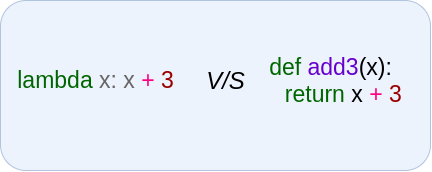

In [66]:
combinedf.Item_Code.value_counts() # FD- Food, NC-NonConsumables
# DR- Drinks

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [67]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [68]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(
['LF','low fat'],'Low Fat')

In [69]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg',
                                                             'Regular')

In [70]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [71]:
combinedf.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [72]:
zerovisible=combinedf[combinedf.Item_Visibility==0]

In [73]:
zerovisible.shape

(879, 13)

In [74]:
879/14204

0.06188397634469164

In [75]:
combinedf.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [76]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [77]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [78]:
combinedf['Outlet_Age']=2021-combinedf.Outlet_Establishment_Year

In [79]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

In [80]:
combinedf.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [81]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [90]:
numericcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=['object'])

In [91]:
print(numericcols.shape)
print(objectcols.shape)

(14204, 5)
(14204, 9)


In [92]:
objectcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Code'],
      dtype='object')

In [93]:
numericcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales

/var/folders/_3/vlhcj16j1v1br6sy922gsnzc0000gn/T/ipykernel_1142/2433453598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales


In [94]:
objectcols=objectcols.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
# axis = 1 is Column Dropping
# axis = 0 is Row Dropping

In [95]:
# Dummy Encode or Label Encode Non Numeric Object Data
objectcolsdummy=pd.get_dummies(objectcols)

In [96]:
print(objectcols.shape)
print(objectcolsdummy.shape)

(14204, 7)
(14204, 42)


In [99]:
objectcolsdummy.head(3)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [100]:
numericcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age', 'Item_Outlet_Sales'],
      dtype='object')

In [101]:
numericcols=numericcols.drop('Outlet_Establishment_Year',axis=1)

In [102]:
combinedfclean=pd.concat([numericcols,objectcolsdummy],axis=1)
# Column Concatenation

In [103]:
bigmarttraindf=combinedfclean[combinedfclean.Item_Outlet_Sales!='test']
bigmarttestdf=combinedfclean[combinedfclean.Item_Outlet_Sales=='test']

In [104]:
print(bigmarttraindf.shape)
print(bigmarttestdf.shape)

(8523, 47)
(5681, 47)


In [105]:
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1)

In [108]:
bigmarttraindf.Item_Outlet_Sales.dtypes

dtype('float64')

In [107]:
bigmarttraindf.Item_Outlet_Sales=pd.to_numeric(
    bigmarttraindf.Item_Outlet_Sales)

/Users/rajeshprabhakar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:ylabel='Item_Outlet_Sales'>

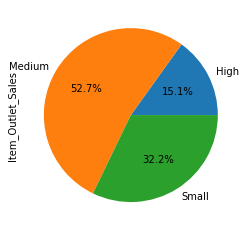

In [144]:
# Piechart of Total Item_Outlet_Sales of Outlet_Size
bigmarttrain.Item_Outlet_Sales.groupby(
    bigmarttrain.Outlet_Size).sum().plot(kind="pie",autopct="%1.1f%%")

<AxesSubplot:ylabel='Item_Outlet_Sales'>

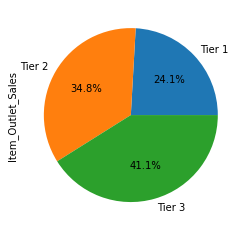

In [145]:
# Piechart of Total Item_Outlet_Sales of Outlet_Location_Type
bigmarttrain.Item_Outlet_Sales.groupby(
    bigmarttrain.Outlet_Location_Type).sum().plot(
    kind="pie",autopct="%1.1f%%")

<AxesSubplot:xlabel='Item_Type'>

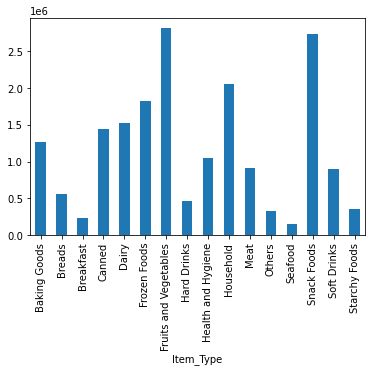

In [147]:
# Piechart of Total Item_Outlet_Sales of Outlet_Location_Type
bigmarttrain.Item_Outlet_Sales.groupby(
    bigmarttrain.Item_Type).sum().plot(
    kind="bar")

In [130]:
# What is the Average Item_Outlet_Sales for different Outlet_Type?
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Type).mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Test NUll Average Item_Outlet_Sales for different Outlet_Type equal
# NULL - There is no Significant difference in Average Item_Outlet_Sales
# for differentt Outlet_Type
# ALT- There is Significant difference in Average Item_Outlet_Sales
# for differentt Outlet_Type

In [131]:
gs=bigmarttrain[bigmarttrain.Outlet_Type=="Grocery Store"]
ST1=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type1"]
ST2=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type2"]
ST3=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type3"]

In [132]:
from scipy.stats import f_oneway

In [133]:
f_oneway(gs.Item_Outlet_Sales,ST1.Item_Outlet_Sales,ST2.Item_Outlet_Sales,
        ST3.Item_Outlet_Sales)

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [134]:
# What is Average Item_Outlet_Sales by different Outlet_Location_Type?
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# Test NUll Average Item_Outlet_Sales for different Outlet_Type equal
# NULL - There is no Significant difference in Average Item_Outlet_Sales
# for differentt Outlet_Location_Type
# ALT- There is Significant difference in Average Item_Outlet_Sales
# for differentt Outlet_Location_Type

In [135]:
t1=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 1"]
t2=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 2"]
t3=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 3"]

In [136]:
f_oneway(t1.Item_Outlet_Sales,t2.Item_Outlet_Sales,t3.Item_Outlet_Sales)

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [138]:
# Test Null No Association between Outlet_Type & Outlet_Location_Type
pd.crosstab(bigmarttrain.Outlet_Type,bigmarttrain.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


In [137]:
from scipy.stats import chi2_contingency

In [139]:
chi2_contingency(pd.crosstab(bigmarttrain.Outlet_Type,bigmarttrain.Outlet_Location_Type))

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598,  353.88419571,  425.67757832],
        [1562.58078141, 1822.35656459, 2192.062654  ],
        [ 260.00985568,  303.23594978,  364.75419453],
        [ 261.97113692,  305.52328992,  367.50557315]]))

In [109]:
y=bigmarttraindf.Item_Outlet_Sales # Dependent Variable
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1) # Independent Variables

<AxesSubplot:ylabel='Frequency'>

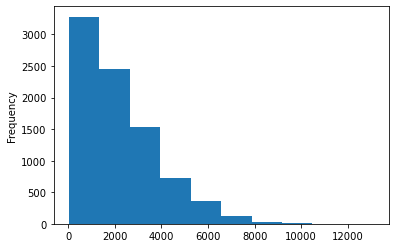

In [110]:
y.plot(kind='hist')

<AxesSubplot:>

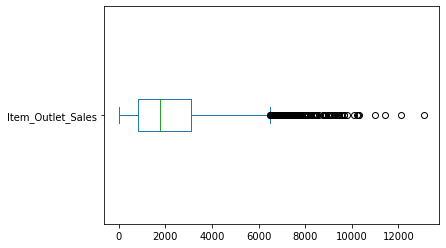

In [111]:
y.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

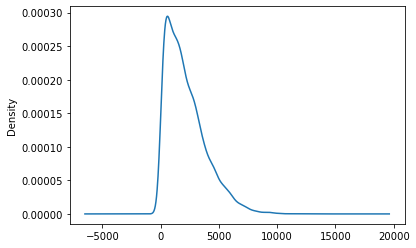

In [112]:
y.plot(kind='density')

In [114]:
# Supervised Learning - Regression Models - 
# Multiple Linear Regression explains linear relationship between a 
# dependent variable(y) and multiple Independent variables (X).
# Multiple Linear Regression is an equation

# y= B0+B1X1+B2X2+B3X3+B4X4+............+BnXn+Et

# y - Dependnet Variable
# B0 - Intercept or Constant. point at which straightline touches y-axis
# B1, B2, B3, B4,... , Bn - Coefficients
# X1, X2, X3, X4,.....,Xn - Independnet Variables
# Et  - Error Term or Residual = ActualValue - PredictedValue

# Matrix Formulation of Multiple Linear Regression
# [B0,B1,B2,B3,B4,...Bn] = (X`*X)^-1*X`*y
# X` - Transpose of X
# X - Independent Variables
# (X`*X)^-1 - Inverse of matrix

# Assumptions of MLR
# 1) Dependent Variable must be Numerical, Continuous closer to Normal
# Distribution with minimum outliers and no missing values
#2) Independent Variables can be both Numerical and Non Numerical
# 3) Linearity - There must a logical linear relationship between 
# dependent variable and independent variables
# 4) No Multicollinearity - Multicollinearity means a very strong 
# correlation(>0.95) between variables. If found do not include both
# variables, choose one among them else, Overfitting problem occur.
# Varaince Inflation Factor (VIF) greater than 2 indicated multicollinearity
# 5) Exogenity - Dependent variable is dependent on Independent variables
# but independent variables do not depend on dependent variable.
# 6) Sample Size must be minimum 20 observations per variable
# Post Model on Residuals
# 7) Residuals must be homoscedasticity of residuals
# 8) Residuals must be normally distributed (Q-Q plot)

# Interpretation of Output in Python
# 1) R Square explains the amount of variance caused in dependent variable
# by the model or Independent variables. preferred range 0.60-0.90
# 2) Intercept + Coefficients 
# Coefficient means one unit change in the variable will lead to
# coefficient value change in dependent variable

# Diagnostic for all Regression Models
# Root Mean Square Error (RMSE) - 
# sqrt(mean((ActualValue-predictedValue)^2))

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
reg=LinearRegression()

In [117]:
regmodel=reg.fit(X,y)

In [118]:
regmodel.score(X,y) # R Square - 0.56377

0.5637737001510252

In [119]:
regmodel.intercept_

-577.1596763296643

In [120]:
print(list(zip(X.columns,regmodel.coef_)))

[('Item_Weight', -0.5200273627394182), ('Item_Visibility', -300.0670763008372), ('Item_MRP', 15.570635789832806), ('Outlet_Age', 14.374228480420827), ('Item_Fat_Content_Low Fat', -21.059166195452057), ('Item_Fat_Content_Regular', 21.059166195449325), ('Item_Type_Baking Goods', -3.2104710018469858), ('Item_Type_Breads', 1.9250378206211984), ('Item_Type_Breakfast', 3.983965053681759), ('Item_Type_Canned', 22.271905888700754), ('Item_Type_Dairy', -53.00446586276465), ('Item_Type_Frozen Foods', -31.253550501582176), ('Item_Type_Fruits and Vegetables', 26.51372579752254), ('Item_Type_Hard Drinks', -47.26078009769698), ('Item_Type_Health and Hygiene', 4.423071407525749), ('Item_Type_Household', -24.342665740882016), ('Item_Type_Meat', -3.858079857797241), ('Item_Type_Others', -6.538845577654497), ('Item_Type_Seafood', 181.66630948761198), ('Item_Type_Snack Foods', -14.608311286521172), ('Item_Type_Soft Drinks', -74.89160051671622), ('Item_Type_Starchy Foods', 18.184754987790082), ('Outlet_Id

In [121]:
# Item_Outlet_Sales= -577.159-0.520*ItemWeight-300.067*ItemVisibility
# + 15.570*ItemMRP + 14.374*OutletAge - 21.059*ItemFatContentLow Fat...

In [122]:
regpredict=regmodel.predict(X)

In [123]:
regpredict

array([4009.76011104,  562.5129848 , 2369.82262179, ..., 1525.94416664,
       1394.19304552, 1209.38313357])

In [125]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [126]:
regresidual=y-regpredict

In [128]:
regresidual.head()

0   -274.622111
1   -119.090185
2   -272.552622
3   -341.004532
4     85.776022
Name: Item_Outlet_Sales, dtype: float64

In [129]:
np.sqrt(np.mean(regresidual**2)) # RMSE - 1127.0330

1127.0330147429931